<a href="https://colab.research.google.com/github/caplove/DX_team_4_repo/blob/main/DX_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터가져오기

In [ ]:
!git clone https://github.com/caplove/DX_team_4_repo.git

Cloning into 'DX_team_4_repo'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 88 (delta 33), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (88/88), done.


In [ ]:
#과제 설명
from IPython.display import Image
#Image('./image/image_01.png',width=800,height=600)

In [ ]:
#Image('./image/image_02.jpg',width=800,height=700)

In [ ]:
#Image('./image/image_03.jpg',width=800,height=700)

In [ ]:
#Image('./image/image_05.jpg',width=800,height=700)

In [ ]:
"""입출력"""
import os

"""전처리"""
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

"""시각화"""
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import seaborn as sns
#sns.set_style("white")
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore') 

In [ ]:
# 하위 폴더내에 각각 파일이 있고, 파일(폴더)명에 class 정보가 있을경우 
# 참조 : https://wikidocs.net/39

df=[]
df = pd.DataFrame()


for (path, dir, files) in os.walk("./DX_team_4_repo/Data/"):
                
        for filename in files:
             ext = os.path.splitext(filename)[-1]  # 확장자가 ext 이면...
             if ext == '.txt':
       
                # 해당파일을 DataFrame으로 읽고 class 추가하기
                print(path + '/' + filename)

                data = pd.read_csv(path + '/'+filename,sep='[:, ,]',names=['ID','accx','accy','accz','gyrx','gyry','gyrz','current','NaN'],header=None,index_col=None)
                data = data.drop(['ID','NaN'],axis=1)     # 다수의 sep는 [ A구분자,B구분자 ] 사용
    
                #Class 컬럼추가 (파일명에서    _앞에 문자열 추출
                class_name = filename.split('.')[0]     
                data.loc[:,'CLASS']=np.array([class_name]*len(data))    

                #모든 Class 데이터 누적 합치기
                df = pd.concat([df,data])

./DX_team_4_repo/Data//coat_3.txt
./DX_team_4_repo/Data//coat_1.txt
./DX_team_4_repo/Data//suit_5.txt
./DX_team_4_repo/Data//coat_2.txt
./DX_team_4_repo/Data//idle.txt
./DX_team_4_repo/Data//suit_3.txt
./DX_team_4_repo/Data//suit_2.txt
./DX_team_4_repo/Data//shirt_3.txt
./DX_team_4_repo/Data//shirt_1.txt
./DX_team_4_repo/Data//shirt_2.txt
./DX_team_4_repo/Data//suit_1.txt
./DX_team_4_repo/Data//suit_4.txt
./DX_team_4_repo/Data//shirt_5.txt
./DX_team_4_repo/Data//coat_5.txt
./DX_team_4_repo/Data//shirt_4.txt
./DX_team_4_repo/Data//coat_4.txt


In [ ]:
df.head()

,accx,accy,accz,gyrx,gyry,gyrz,current,CLASS
0,-0.01,-0.02,1.02,-1.16,1.10,-1.40,0.81,coat_3
1,-0.03,-0.00,0.96,1.34,0.98,-1.40,0.81,coat_3
2,0.01,0.01,1.05,1.16,1.16,-1.16,0.72,coat_3
3,-0.01,-0.01,0.98,0.24,1.10,-1.22,0.56,coat_3
4,-0.01,0.05,0.96,-1.28,1.16,-1.34,0.88,coat_3


In [ ]:
df.tail()

,accx,accy,accz,gyrx,gyry,gyrz,current,CLASS
18280,-0.01,-0.02,1.04,-0.79,1.28,-1.22,1.26,coat_4
18281,-0.01,-0.01,0.99,0.85,1.16,-1.22,0.91,coat_4
18282,-0.01,-0.00,0.97,1.53,1.10,-1.22,0.85,coat_4
18283,0.02,0.04,1.00,0.61,1.34,-1.16,0.78,coat_4
18284,0.01,0.08,0.94,-1.22,1.28,-1.22,0.72,coat_4


In [ ]:
df.describe()

,accx,accy,accz,gyrx,gyry,gyrz,current
count,274582.000000,274582.000000,274582.000000,274582.000000,274582.000000,274582.000000,274582.000000
mean,-0.000210,-0.000524,0.998872,0.263806,1.062795,-1.314019,0.084912
std,0.018129,0.035233,0.059794,1.455410,0.179769,0.192238,0.619515
min,-0.180000,-0.190000,0.570000,-15.630000,0.060000,-2.140000,-3.630000
25%,-0.010000,-0.020000,0.970000,-0.550000,0.980000,-1.400000,-0.480000
50%,-0.000000,0.000000,1.000000,0.240000,1.040000,-1.280000,0.070000
75%,0.010000,0.020000,1.030000,1.040000,1.160000,-1.220000,0.650000
max,0.140000,0.220000,1.440000,15.560000,2.320000,-0.430000,1.810000


In [ ]:
""" 설명 변수 및 반응변수 구분 """
x = df.drop(['CLASS'],axis=1)
y = df['CLASS']

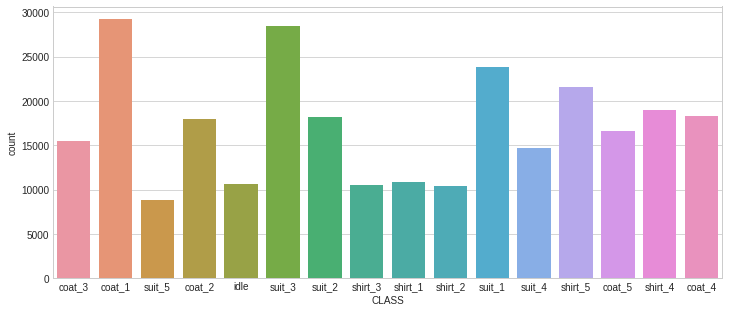

In [ ]:
"""분포 확인"""
plt.figure(figsize=(12, 5))
sns.countplot(y)           # 돗수분포
plt.show()

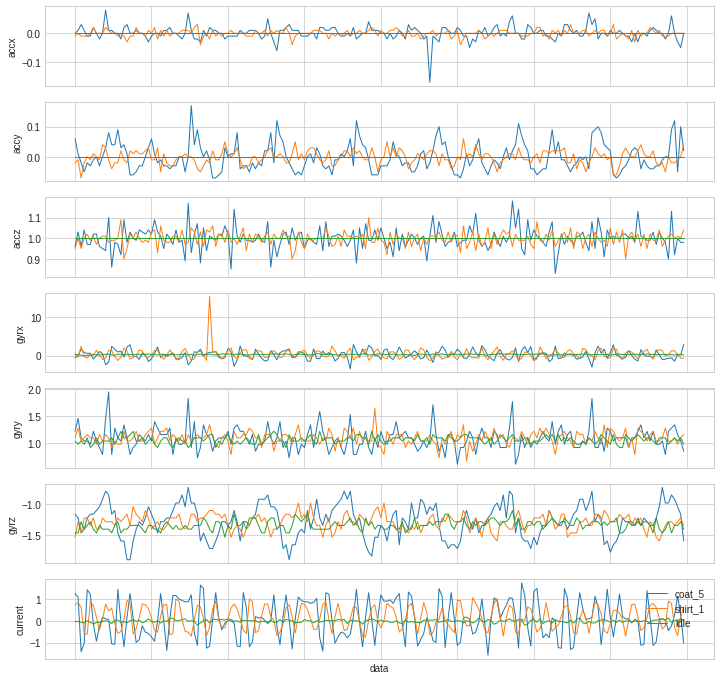

In [ ]:
"""데이터 확인"""
# 몇 개의 Class에 대하여, 맨 앞 1초간 데이터 관찰

class_list=['coat_5','shirt_1','idle']
sensor_list=['accx','accy','accz','gyrx','gyry','gyrz','current']
data_length=200       # 2초  @ 10ms sampling

plt.figure(figsize=(12,12))

for i in class_list:
    idx_class = df[df.CLASS == i]

    for j in sensor_list:
        idx_j = sensor_list.index(j)    # j의 위치를 찾아 subplot의 위치를 정함.
        plt.subplot(7,1,idx_j+1)
        plt.plot(idx_class[j][0:data_length],label=i,linewidth=1)
        plt.ylabel(j)
        plt.xticks(visible=False)
    
plt.xlabel('data')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#Image('./image/image_06.jpg')

In [ ]:
"""전처리 / 데이터 증강 (TBD)"""
#Image('./image/image_08.jpg',width=800, height=400)
# jittering, Scaling, Rotation,Permutation,Magnitude Warping,TimeWarp,Cropping ... 

'전처리 / 데이터 증강 '

In [ ]:
"""전처리 / 특징 추출 """
"""MFCC"""
#Image('./image/image_09.jpg', width=400, height=100)   # https://blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=sooftware&logNo=221661644808

'MFCC'

In [ ]:
"""전처리 모듈"""
"""MFCC"""
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

"""변수"""
fs=100
no_of_data=400
class_list=['idle', 'suit_1','suit_2','suit_3','suit_4','suit_5','shirt_1','shirt_2','shirt_3',
            'shirt_4','shirt_5','coat_1','coat_2','coat_3','coat_4','coat_5']

features_all=pd.DataFrame()

"""함수"""
# list 들어오면, n개씩 쪼개서 return   https://jsikim1.tistory.com/141
def list_chunk(lst,n):
    return [lst[i:i+n] for i in range(0,len(lst),n)], len(lst)//n      #  // 몫


# 각 class별로 n개씩 묶어서(chunk) -->  mfcc -->  merge 함.

# chunk
for i in class_list:       # class별로 'idle', 'suit1', ....
    idx_class = df.CLASS == i
    x_in, count = list_chunk(x['accx'][idx_class],no_of_data)   # x 
    y_in, count = list_chunk(x['accy'][idx_class],no_of_data)   # y 
    z_in, count = list_chunk(x['accz'][idx_class],no_of_data)   # z 
    current_in, count = list_chunk(x['current'][idx_class],no_of_data)   # current 
    class_in,count = list_chunk(y[idx_class],no_of_data)   # label
    print("class:", i, "    chunk개수:",count)  # class별 chunked 개수 확인
    
# mfcc & merge
    for j in range(0,count-1):
        # mfcc
        x_in_chunk = np.array(x_in[j])
        y_in_chunk = np.array(y_in[j])
        z_in_chunk = np.array(z_in[j])
        current_in_chunk = np.array(current_in[j])
        #print(x_in_chunk.shape)            # (400,)
        mfccs_x_chunk = librosa.feature.mfcc(x_in_chunk, sr=fs, n_mfcc=13)
        mfccs_y_chunk = librosa.feature.mfcc(y_in_chunk, sr=fs, n_mfcc=13)
        mfccs_z_chunk = librosa.feature.mfcc(z_in_chunk, sr=fs, n_mfcc=13)
        mfccs_current_chunk = librosa.feature.mfcc(current_in_chunk, sr=fs, n_mfcc=13)
        #print(mfccs_x_chunk.shape)         # (13,1)
        class_in_chunk = class_in[0]
        #print(class_in_chunk)

        # merge
        features_chunk = np.concatenate((mfccs_x_chunk,mfccs_y_chunk,mfccs_y_chunk,mfccs_current_chunk),axis=0)
        #print(features_chunk)
        features_chunk = pd.DataFrame(features_chunk).T
        features_chunk['class']=class_in_chunk
        #print(features_chunk.head())
        features_all = pd.concat([features_all,features_chunk],axis=0)
        #print(features_chunk.head())

class: idle     chunk개수: 26
class: suit_1     chunk개수: 59
class: suit_2     chunk개수: 45
class: suit_3     chunk개수: 71
class: suit_4     chunk개수: 36
class: suit_5     chunk개수: 22
class: shirt_1     chunk개수: 27
class: shirt_2     chunk개수: 25
class: shirt_3     chunk개수: 26
class: shirt_4     chunk개수: 47
class: shirt_5     chunk개수: 53
class: coat_1     chunk개수: 73
class: coat_2     chunk개수: 44
class: coat_3     chunk개수: 38
class: coat_4     chunk개수: 45
class: coat_5     chunk개수: 41


In [ ]:
# x = mfcc(x,y,z,current) 13 * 4 = 52
# y = label
features_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,class
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201.391341,0.925284,-4.041210,7.387525,1.751451,0.090655,0.394997,1.490920,2.452048,-4.733238,3.687767,0.847616,3.709894,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.739337,2.944957,0.142026,-0.573331,1.535497,-3.454344,-7.073645,-2.805138,-1.876212,-2.081281,-6.421273,1.218584,0.310433,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.218297,1.315889,5.813116,-5.363791,-6.252804,-2.776524,-2.444918,0.976442,3.285535,-0.567978,-2.320336,-0.079556,5.451989,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.913445,1.792793,-1.025874,-3.227174,-7.178538,3.415736,-5.713125,-3.127864,1.936888,4.775039,-2.434643,3.841988,2.972255,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.336192,-5.578025,-3.158794,-1.916322,-3.194026,-7.659798,-5.715364,0.557323,6.521582,6.264885,-7.649926,3.726388,4.487350,idle


In [ ]:
features_all.tail()   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,class
0,82.218858,11.514296,8.109126,-0.826206,1.500793,-7.749490,-3.190781,-0.905061,1.113443,2.214175,-4.229521,2.573233,1.012199,114.402952,4.699549,12.647755,6.841160,-2.757989,-3.268643,-4.791357,-4.507416,-2.438394,-4.237886,-1.209893,-8.479798,-3.285046,114.402952,4.699549,12.647755,6.841160,-2.757989,-3.268643,-4.791357,-4.507416,-2.438394,-4.237886,-1.209893,-8.479798,-3.285046,386.224534,24.168853,-5.518543,8.149768,15.704667,6.195449,-7.753275,-8.995780,-3.657464,12.250295,8.464571,-10.727451,-19.050755,coat_5
0,87.384303,7.041747,17.038185,-2.424284,-4.747351,-6.197911,-3.090751,-0.844570,0.950333,3.481782,-4.670973,4.264745,2.333291,107.843196,5.980896,10.356925,5.455692,-2.031696,-5.213880,-8.246393,-10.951054,-9.460867,-4.685298,-2.409579,-3.917705,-7.784962,107.843196,5.980896,10.356925,5.455692,-2.031696,-5.213880,-8.246393,-10.951054,-9.460867,-4.685298,-2.409579,-3.917705,-7.784962,388.806841,23.906882,-15.797207,4.313351,18.047953,3.367784,0.496315,-4.941155,-0.635187,5.770538,4.056585,-12.341575,-18.720171,coat_5
0,77.494786,8.430562,1.567027,-1.346171,-3.866274,-7.346592,-4.962651,-0.800154,-1.755582,-5.602699,3.057232,3.006021,-3.164058,102.904387,2.909351,16.398204,-3.756063,-5.808937,-3.365377,-5.372759,-7.053925,-8.394993,-0.466607,0.078845,-8.684534,-1.532884,102.904387,2.909351,16.398204,-3.756063,-5.808937,-3.365377,-5.372759,-7.053925,-8.394993,-0.466607,0.078845,-8.684534,-1.532884,389.836163,26.052042,-10.309254,2.970241,17.765834,-0.668781,-6.610757,-6.391456,-9.421843,11.327399,3.576860,-17.609972,-15.117508,coat_5
0,87.841561,5.448141,2.058007,-3.028893,-3.669770,-2.166143,-4.918072,-2.206995,-1.874655,4.787736,3.466552,3.349619,3.110663,118.574126,6.604399,4.698898,6.505302,-2.840159,-5.169906,-5.128423,-13.316335,-9.115468,-8.691413,4.162464,-4.803487,-2.786158,118.574126,6.604399,4.698898,6.505302,-2.840159,-5.169906,-5.128423,-13.316335,-9.115468,-8.691413,4.162464,-4.803487,-2.786158,382.237946,23.060764,-10.045828,3.892424,14.178505,-3.510331,-10.547467,-1.224729,0.598610,6.835686,0.156511,-3.881217,-11.526374,coat_5
0,98.144517,-4.955056,4.291587,2.458477,-2.967500,-6.651222,-6.115759,-2.976504,-3.489727,1.985995,-0.386728,1.976533,1.560350,102.784341,4.066491,12.338156,8.876677,1.827938,3.002299,0.731124,-8.461414,-4.592574,2.943199,-1.487605,-1.757966,-19.284280,102.784341,4.066491,12.338156,8.876677,1.827938,3.002299,0.731124,-8.461414,-4.592574,2.943199,-1.487605,-1.757966,-19.284280,391.351631,14.071633,-16.889915,4.744895,14.003929,2.153404,-9.973846,-1.535199,-4.336413,2.429835,3.985822,-11.294440,-14.947567,coat_5


In [ ]:
features_all.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,9.520378,1.152315,2.404368,-0.157191,-3.275804,-4.341392,-3.603741,-3.536357,-2.145743,-0.116901,1.754506,1.343911,0.231230,50.025560,1.594870,5.585551,0.921789,-3.288646,1.962870,-6.290673,-8.487891,-5.453795,-0.405814,1.276777,-2.730289,-3.477126,50.025560,1.594870,5.585551,0.921789,-3.288646,1.962870,-6.290673,-8.487891,-5.453795,-0.405814,1.276777,-2.730289,-3.477126,351.594429,32.478605,-14.293601,-12.726434,-3.648879,2.406240,-0.398452,-0.509952,2.714168,1.540483,-4.473579,-5.783976,-4.093725
std,227.996625,7.515501,4.873648,4.205486,3.970633,4.311770,3.490020,3.623241,3.451544,3.752566,3.832541,3.373887,3.833687,235.907630,5.937462,4.328532,4.173287,4.107105,5.852810,3.774578,3.507500,3.348235,3.515740,3.777813,3.948886,3.895239,235.907630,5.937462,4.328532,4.173287,4.107105,5.852810,3.774578,3.507500,3.348235,3.515740,3.777813,3.948886,3.895239,33.242252,9.010133,8.375612,10.116966,9.273555,5.262976,6.125604,4.226763,4.658344,7.029464,6.562564,7.415992,9.185591
min,-1131.370850,-18.045910,-12.812237,-17.401810,-16.149565,-21.187422,-15.800104,-15.626307,-11.990769,-12.058245,-8.690887,-10.256186,-12.271255,-1131.370850,-20.647620,-5.449274,-13.788668,-17.403392,-14.842226,-20.388093,-19.148447,-15.407898,-13.521306,-10.447783,-12.805237,-19.284280,-1131.370850,-20.647620,-5.449274,-13.788668,-17.403392,-14.842226,-20.388093,-19.148447,-15.407898,-13.521306,-10.447783,-12.805237,-19.284280,194.885693,-7.474028,-43.364134,-33.389145,-28.751441,-17.749917,-18.544602,-11.791473,-11.714078,-18.751441,-20.259759,-24.786947,-24.629218
25%,23.870656,-4.068140,-0.747425,-2.877173,-5.865065,-6.859795,-5.889860,-6.008251,-4.575783,-2.479156,-0.594265,-1.031690,-2.205211,63.738541,-1.951394,2.505834,-1.709745,-5.838959,-2.624303,-8.712274,-10.864461,-7.890358,-2.751693,-1.093997,-5.647759,-6.173832,63.738541,-1.951394,2.505834,-1.709745,-5.838959,-2.624303,-8.712274,-10.864461,-7.890358,-2.751693,-1.093997,-5.647759,-6.173832,338.909221,28.332082,-18.877461,-20.489916,-9.839163,-0.664819,-4.685038,-3.486699,-0.605207,-3.645339,-9.633210,-11.050146,-11.893438
50%,47.489522,0.106755,2.209302,0.000000,-3.320750,-4.229959,-3.514860,-3.538571,-2.022355,0.000000,1.567264,1.193631,0.213206,97.869724,1.324800,5.222906,0.987529,-3.288990,1.936196,-6.430870,-8.519275,-5.419075,-0.305291,1.053597,-2.731671,-3.839696,97.869724,1.324800,5.222906,0.987529,-3.288990,1.936196,-6.430870,-8.519275,-5.419075,-0.305291,1.053597,-2.731671,-3.839696,354.192162,33.695216,-13.651843,-14.464602,-5.389242,2.489306,0.081629,-0.776521,2.600726,1.733590,-5.104560,-6.452456,-3.569606
75%,78.732322,5.763120,5.867276,2.670842,-0.413476,-1.410384,-0.949488,-0.932809,0.000000,2.366066,4.068250,3.628847,2.729043,112.152568,5.283725,8.396094,3.849366,-0.290686,6.438478,-4.097376,-6.587952,-2.959783,2.123888,3.904074,0.000000,-0.580983,112.152568,5.283725,8.396094,3.849366,-0.290686,6.438478,-4.097376,-6.587952,-2.959783,2.123888,3.904074,0.000000,-0.580983,371.304774,38.203605,-8.984850,-6.030099,1.157225,5.575433,3.729543,2.183574,5.790892,6.265736,0.431052,-0.626431,3.647415
max,111.856770,25.968022,17.038185,11.986751,9.425252,7.166094,6.622039,10.242824,9.965253,11.087663,15.157634,12.840048,12.883528,153.826784,23.296031,18.820457,13.380764,10.0

In [ ]:
"""분류기 모형 설정"""


'분류기 모형 설정'

In [ ]:
"""1차 평가 /w test_set"""


'1차 평가 /w test_set'